### Create gpkg from shp 

In [1]:
import geopandas as gpd

In [2]:
data_shp = gpd.read_file("/home/gfa/GSDMA2019/playground/pilote/pilote/Pilote_v7.0.shp")

In [3]:
data_shp.to_file("data.gpkg", driver="GPKG")

In [4]:
data_from_gpkg = gpd.read_file("/home/gfa/GSDMA2019/playground/pilote/data.gpkg")

data_from_gpkg is a geodataframe 

In [5]:
type(data_from_gpkg)

geopandas.geodataframe.GeoDataFrame

In [6]:
? gpd.geodataframe

### Inspecting data

In [7]:
data_from_gpkg

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406)
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077)
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936)
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782)
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641)
...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (152886.080 122578.566)
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (152883.640 122577.576)
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (152884.220 122576.706)
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (152888.640 122578.796)


In [8]:
data_from_gpkg.head()

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406)
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077)
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936)
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782)
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641)


## Work on data

### Access

In [30]:
data_from_gpkg['diam']

0     2
1     2
2     3
3     2
4     2
     ..
80    0
81    0
82    0
83    0
84    0
Name: diam, Length: 85, dtype: int64

### Add a Colomn

In [25]:
data_from_gpkg['new_column'] = None

In [32]:
data_from_gpkg.loc[0, 'new_column'] = 'Senaatintori'

In [33]:
data_from_gpkg

,Id,Type,Pilote,Ref,diam,Valid,Syscal,Impo,Inox,geometry,new_column
0,0,1,1,111,2,1,1.0,0.0,1.0,POINT (152894.553 122591.406),Senaatintori
1,0,1,1,120,2,1,1.0,0.0,1.0,POINT (152881.336 122588.077),None
2,0,2,1,217,3,1,1.0,1.0,1.0,POINT (152885.774 122586.936),None
3,0,1,1,116,2,1,1.0,0.0,1.0,POINT (152883.804 122589.782),None
4,0,2,1,214,2,1,1.0,1.0,1.0,POINT (152888.242 122588.641),None
...,...,...,...,...,...,...,...,...,...,...,...
80,0,5,0,31,0,0,0.0,NaN,NaN,POINT (152886.080 122578.566),None
81,0,6,0,40,0,0,0.0,NaN,NaN,POINT (152883.640 122577.576),None
82,0,6,0,41,0,0,0.0,NaN,NaN,POINT (152884.220 122576.706),None
83,0,0,0,12,0,1,NaN,NaN,NaN,POINT (152888.640 122578.796),None


## Plot

### Naive

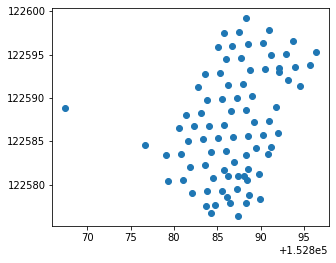

In [9]:
data_from_gpkg.plot()

## CRS

EPSG 31370 (Lambert 72)

In [10]:
data_from_gpkg = data_from_gpkg.to_crs(epsg=31370)

/home/gfa/.local/share/virtualenvs/GSDMA2019-F9ES6BKJ/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [11]:
import contextily as ctx

### Add background tiles to plot

In [15]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

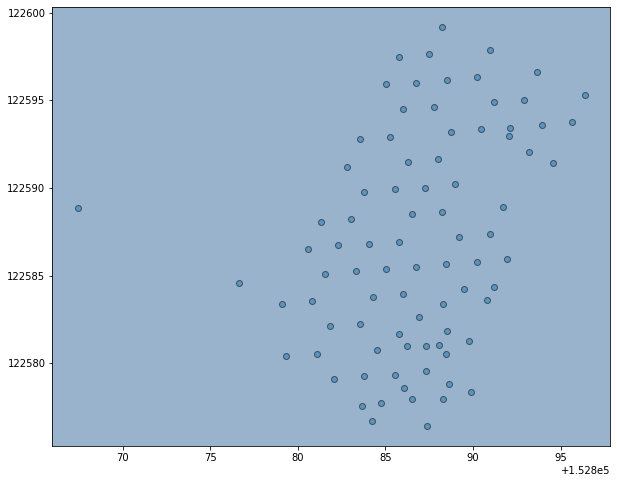

In [24]:
ax = data_from_gpkg.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax,zoom=1)

In [ ]:
? ctx.tile